##Importing Libraries

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score
from imblearn.over_sampling import SMOTE
from scipy import stats

In [73]:
!git clone https://github.com/Insane110/CL653.git

fatal: destination path 'CL653' already exists and is not an empty directory.


In [74]:
plot_dir = '/content/graphs'
os.makedirs(plot_dir, exist_ok=True)

In [75]:
df = pd.read_csv("/content/CL653/drug200.csv")

In [76]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [78]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

NO null values to be found

In [79]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

It can be seen that from results above, DrugY has more amount than other types of drugs

In [80]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

The distribution of patient gender is balanced.

In [81]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

The distribution of blood pressure level is balanced.

In [82]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

The distribution of cholesterol level is balanced.

In [83]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [84]:
skewAge = df['Age'].skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [85]:
skewNatoK = df['Na_to_K'].skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


####EDA

<ipython-input-86-1ded242599b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


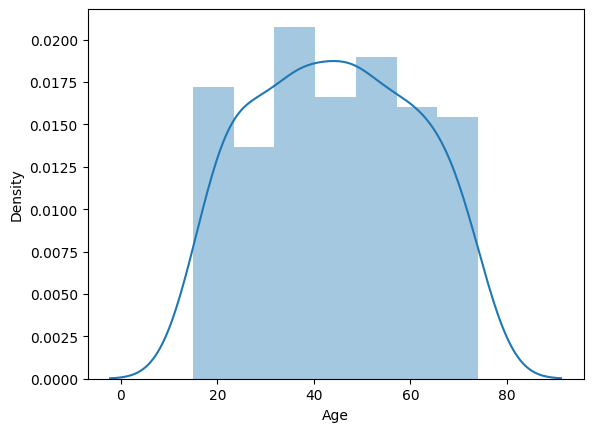

In [86]:
sns.distplot(df['Age'])
plt.savefig(os.path.join(plot_dir, 'Age_Density.png'))

<ipython-input-87-6d08617e60b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K'])


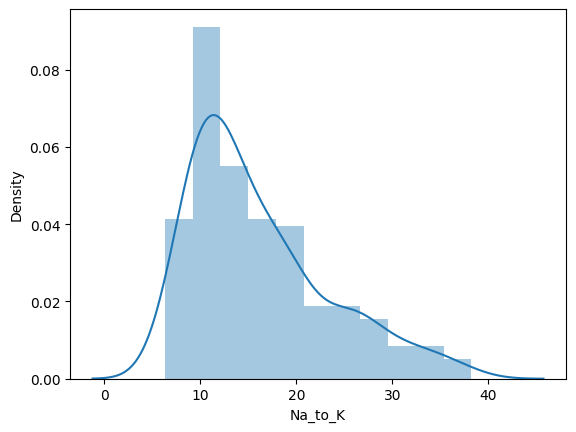

In [87]:
sns.distplot(df['Na_to_K'])
plt.savefig(os.path.join(plot_dir, 'Na_to_K_Density.png'))

The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

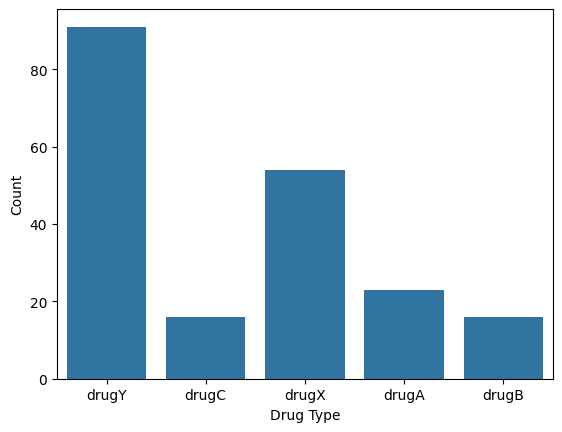

In [88]:
sns.countplot(x="Drug", data=df)
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.savefig(os.path.join(plot_dir, 'Drug_type_count.png'))

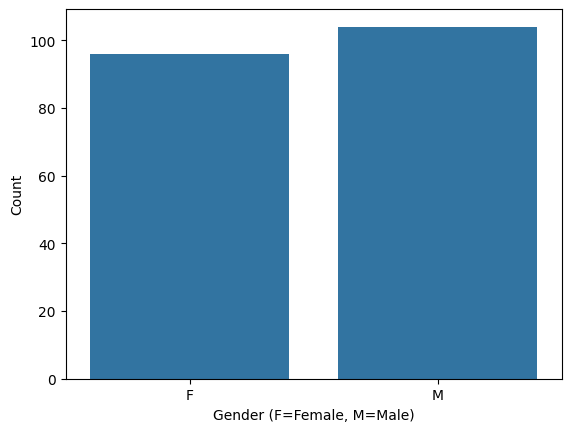

In [89]:
sns.countplot(x="Sex", data=df)
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Count')
plt.savefig(os.path.join(plot_dir, 'Gender_count.png'))

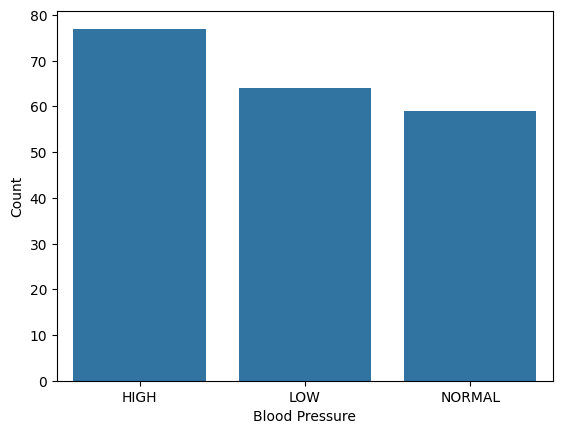

In [90]:
sns.countplot(x="BP", data=df)
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.savefig(os.path.join(plot_dir, 'blood_pressure_count.png'))

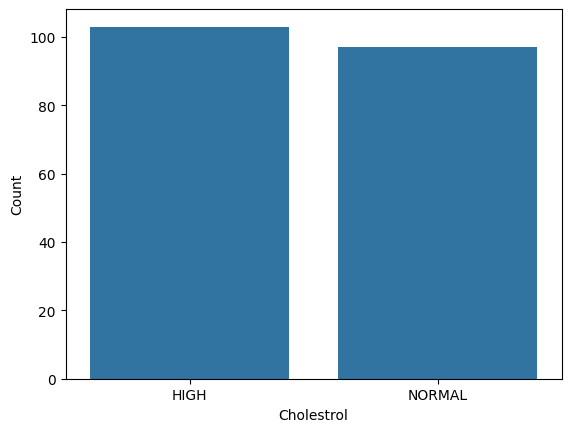

In [91]:
sns.countplot(x="Cholesterol", data=df)
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.savefig(os.path.join(plot_dir, 'cholestrol.png'))

<Figure size 4000x4000 with 0 Axes>

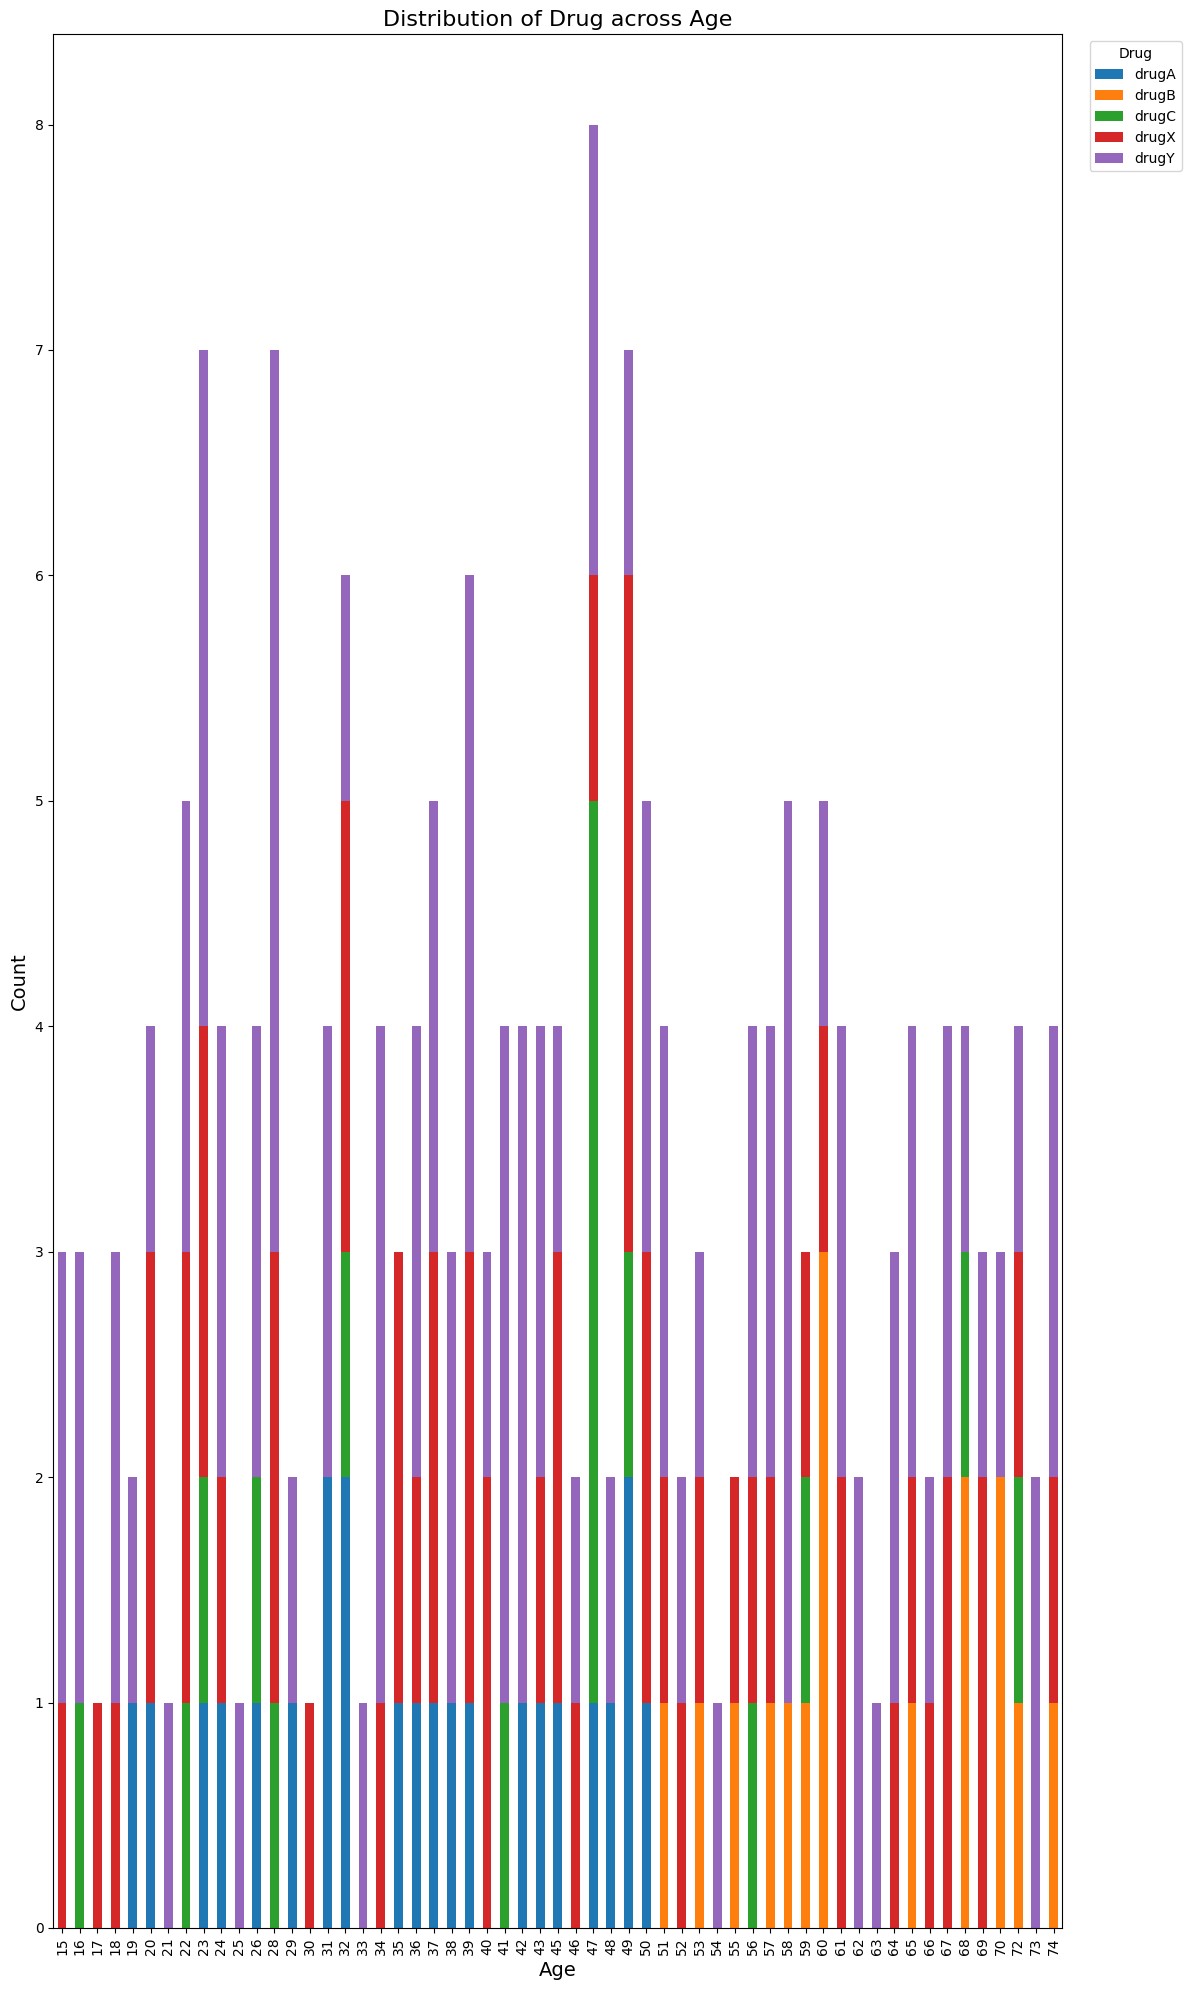

In [92]:
binary_col = 'Drug'
grouped = df.groupby(['Age', binary_col]).size().reset_index(name='count')
pivoted = grouped.pivot(index='Age', columns=binary_col, values='count')
pivoted = pivoted.fillna(0)
plt.figure(figsize=(40, 40))
pivoted.plot(kind='bar', stacked=True,figsize=(12,20))
plt.title('Distribution of Drug across Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90,fontsize=10)
plt.legend(title='Drug', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'Drug_across_age.png'))

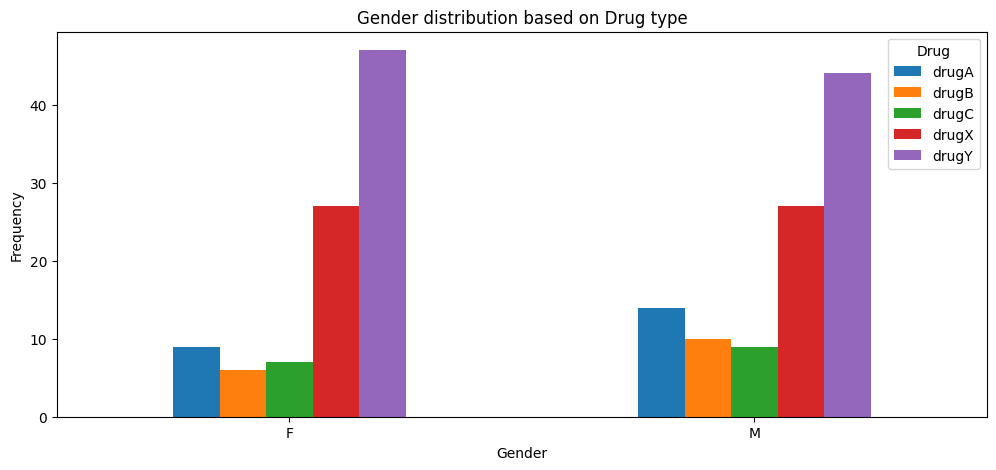

In [93]:
pd.crosstab(df['Sex'],df['Drug']).plot(kind="bar",figsize=(12,5))
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig(os.path.join(plot_dir, 'Drug_across_gender.png'))

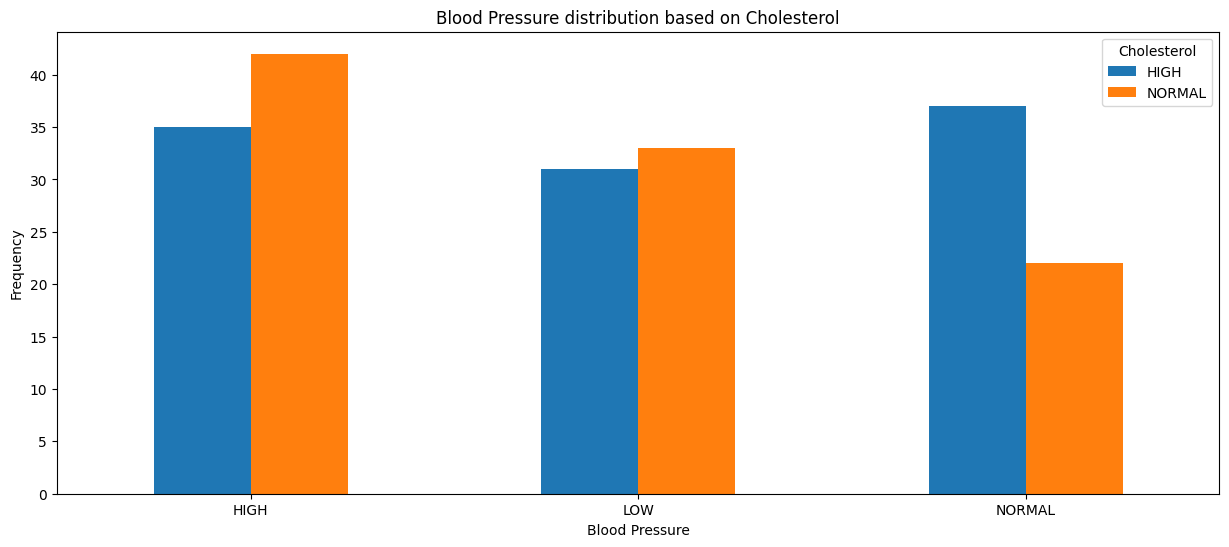

In [94]:
pd.crosstab(df['BP'],df['Cholesterol']).plot(kind="bar",figsize=(15,6))
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig(os.path.join(plot_dir, 'cholesterol_across_bp.png'))

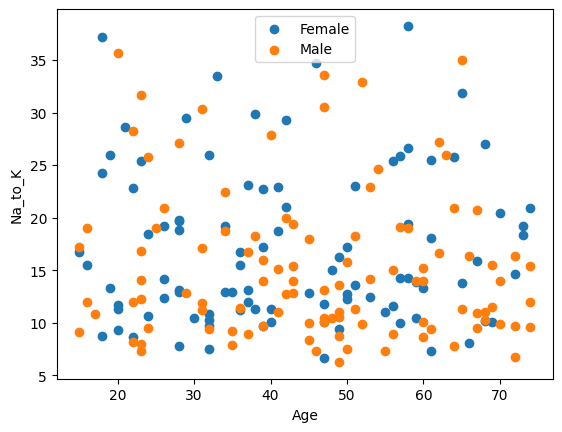

In [95]:
plt.scatter(x=df['Age'][df['Sex']=='F'], y=df['Na_to_K'][(df['Sex']=='F')])
plt.scatter(x=df['Age'][df['Sex']=='M'], y=df['Na_to_K'][(df['Sex']=='M')])
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.savefig(os.path.join(plot_dir, 'gender_distribution.png'))

###Outlier Detection

In [96]:
def remove_outliers_zscore(column):
    z_scores = stats.zscore(column)
    outlier_indices = abs(z_scores) > 3
    column[outlier_indices] = column.mean()
    return column

In [97]:
cleaned_column = remove_outliers_zscore(df['Na_to_K'])
df['Na_to_K_cleaned'] = cleaned_column

<ipython-input-96-035d584e3cab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()


In [98]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_cleaned
0,23,F,HIGH,HIGH,25.355,drugY,25.355
1,47,M,LOW,HIGH,13.093,drugC,13.093
2,47,M,LOW,HIGH,10.114,drugC,10.114
3,28,F,NORMAL,HIGH,7.798,drugX,7.798
4,61,F,LOW,HIGH,18.043,drugY,18.043


<ipython-input-99-08b167fcbc66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K_cleaned'])


<Axes: xlabel='Na_to_K_cleaned', ylabel='Density'>

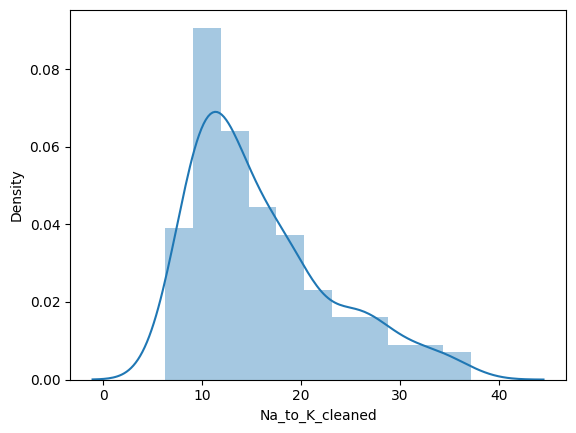

In [99]:
sns.distplot(df['Na_to_K_cleaned'])

#As we can see there are no Outliers in the column

In [100]:
df=df.drop('Na_to_K',axis=1)

In [101]:
df['Age'].value_counts()

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64

The age will be divided into **7 age categories**:
*  1 - 20 y.o.
*  21 - 30 y.o.
*  31 - 40 y.o.
*  41 - 50 y.o.
*  51 - 60 y.o.
*  61 - 70 y.o.
*  71-80 y.o.

In [102]:
# Create a list of condition-label pairs
bins = [1, 20, 30, 40, 50, 60,70,80]
labels = ['1-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80']

# Create new columns based on the conditions
df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)

In [103]:
df.head()

,Age,Sex,BP,Cholesterol,Drug,Na_to_K_cleaned,Age_binned
0,23,F,HIGH,HIGH,drugY,25.355,21-30
1,47,M,LOW,HIGH,drugC,13.093,41-50
2,47,M,LOW,HIGH,drugC,10.114,41-50
3,28,F,NORMAL,HIGH,drugX,7.798,21-30
4,61,F,LOW,HIGH,drugY,18.043,61-70


In [104]:
print(df['Na_to_K_cleaned'].value_counts().sort_index())

Na_to_K_cleaned
6.269     1
6.683     1
6.769     1
7.261     1
7.285     1
         ..
33.542    1
34.686    1
34.997    1
35.639    1
37.188    1
Name: count, Length: 198, dtype: int64


The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  30 - 40.

In [105]:
bins2 = [0, 9,19,29,39]
labels2 = ['<10', '10-20', '20-30', '30-40']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K_cleaned'], bins=bins2, labels=labels2,include_lowest=True).astype(str)

In [106]:
df.head()

,Age,Sex,BP,Cholesterol,Drug,Na_to_K_cleaned,Age_binned,Na_to_K_binned
0,23,F,HIGH,HIGH,drugY,25.355,21-30,20-30
1,47,M,LOW,HIGH,drugC,13.093,41-50,10-20
2,47,M,LOW,HIGH,drugC,10.114,41-50,10-20
3,28,F,NORMAL,HIGH,drugX,7.798,21-30,<10
4,61,F,LOW,HIGH,drugY,18.043,61-70,10-20


In [107]:
df=df.drop(['Age','Na_to_K_cleaned'],axis=1)

The dataset will be split into **70% training and 30% testing**.

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [109]:
X = df.drop(['Drug'], axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state = 54)

The Feature Engineering method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

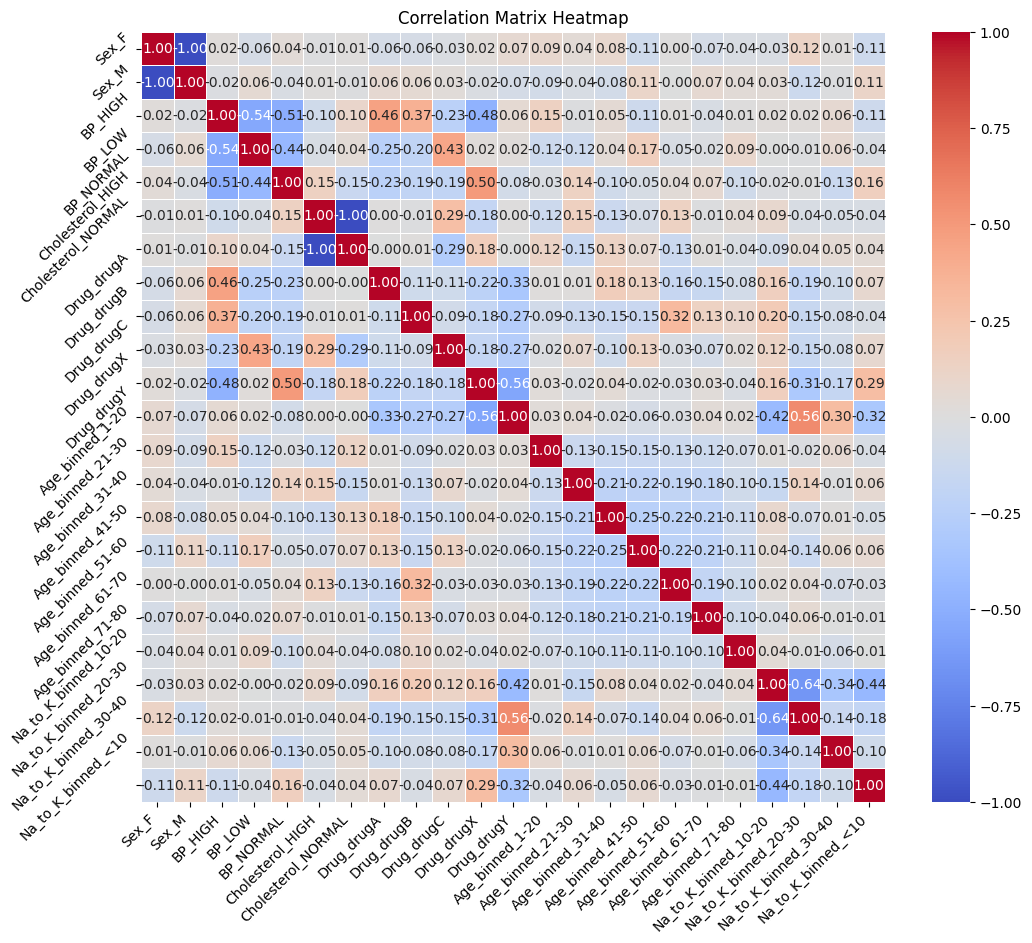

In [110]:
dff = pd.get_dummies(df).astype(int)
corr_matrix = dff.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=45,ha="right")
plt.title('Correlation Matrix Heatmap')
plt.savefig(os.path.join(plot_dir, 'Correlation_Heatmap.png'))

In [111]:
X_train = pd.get_dummies(X_train).astype(int)
X_test = pd.get_dummies(X_test).astype(int)

In [112]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_1-20,Age_binned_21-30,Age_binned_31-40,Age_binned_41-50,Age_binned_51-60,Age_binned_61-70,Age_binned_71-80,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_30-40,Na_to_K_binned_<10
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
40,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
51,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
10,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
39,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0


In [113]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_1-20,Age_binned_21-30,Age_binned_31-40,Age_binned_41-50,Age_binned_51-60,Age_binned_61-70,Age_binned_71-80,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_30-40,Na_to_K_binned_<10
179,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0
166,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
187,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
119,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
186,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


## SMOTE
Since the number of 'DrugY' is more than other types of drugs, **oversampling is carried out to avoid overfitting**.

In [114]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

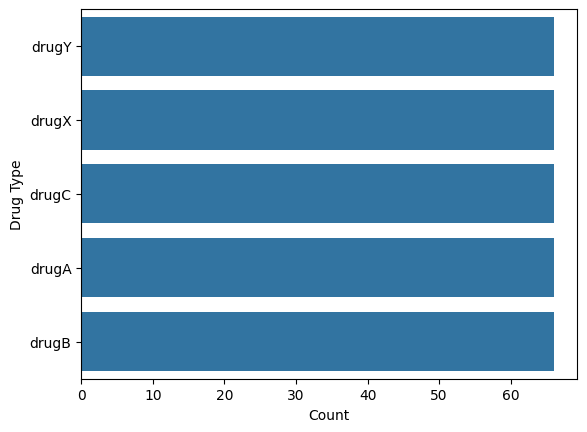

In [115]:
sns.countplot(y=y_train, data=df)
plt.ylabel('Drug Type')
plt.xlabel('Count')
plt.savefig(os.path.join(plot_dir, 'smote.png'))

As can be seen, the distrubtion of drug type are now balanced.

###Various ML models applied

###Logistic Regression

              precision    recall  f1-score   support

       drugA       0.69      1.00      0.82         9
       drugB       0.80      1.00      0.89         8
       drugC       0.62      1.00      0.77         5
       drugX       0.81      1.00      0.90        13
       drugY       1.00      0.52      0.68        25

    accuracy                           0.80        60
   macro avg       0.79      0.90      0.81        60
weighted avg       0.86      0.80      0.78        60

Logistic Regression accuracy is: 80.00%


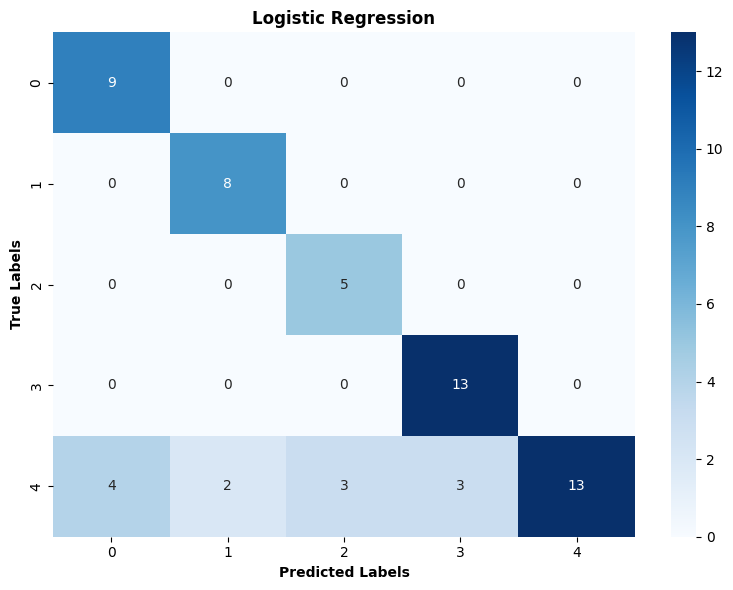

In [116]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1)
acc1 = accuracy_score(y_pred1,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(acc1*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Logistic Regression', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'lr_cm.png'))

###K Neighbours Classifier

              precision    recall  f1-score   support

       drugA       0.42      0.89      0.57         9
       drugB       0.50      0.50      0.50         8
       drugC       0.50      1.00      0.67         5
       drugX       0.75      0.69      0.72        13
       drugY       0.73      0.32      0.44        25

    accuracy                           0.57        60
   macro avg       0.58      0.68      0.58        60
weighted avg       0.64      0.57      0.55        60

K Neighbours accuracy is: 56.67%


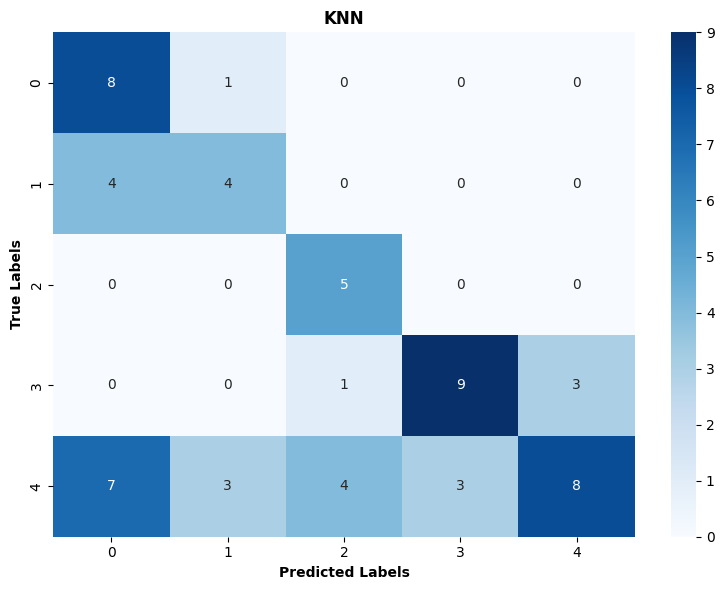

In [117]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
acc2 = accuracy_score(y_pred2,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(acc2*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('KNN', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'KNN_cm.png'))

KNN Acc Max 63.33%


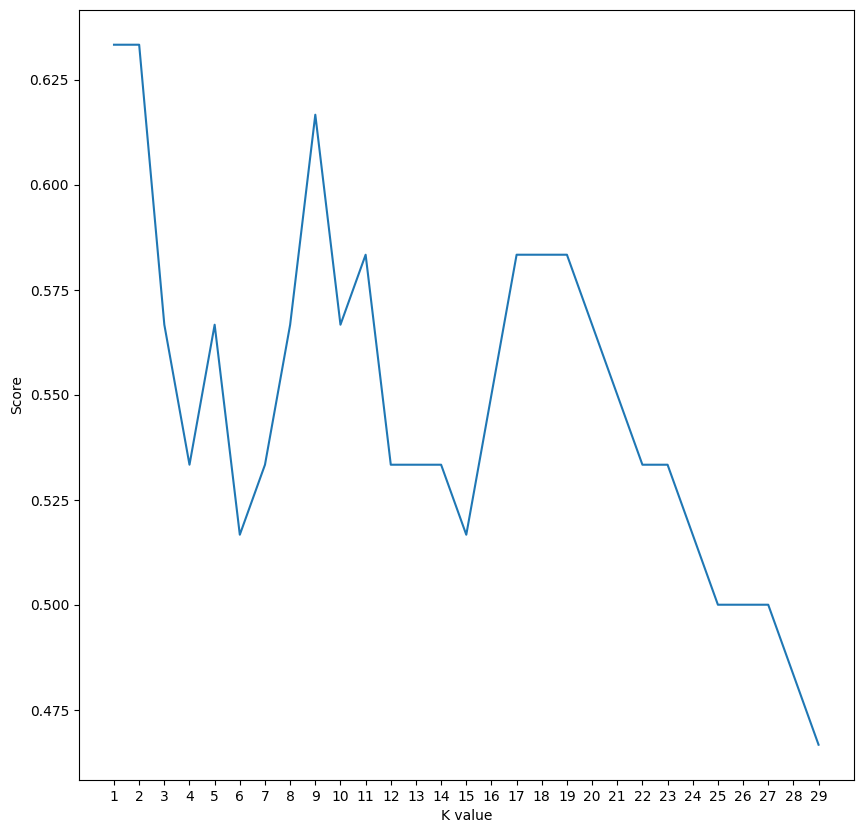

In [118]:
scores = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10,10))
plt.plot(range(1,30), scores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.savefig(os.path.join(plot_dir,'KNN_plots.png'))
Max_acc = max(scores)
print("KNN Acc Max {:.2f}%".format(Max_acc*100))

###Support Vector Machine (SVM)

              precision    recall  f1-score   support

       drugA       0.64      1.00      0.78         9
       drugB       0.78      0.88      0.82         8
       drugC       0.62      1.00      0.77         5
       drugX       0.83      0.77      0.80        13
       drugY       0.82      0.56      0.67        25

    accuracy                           0.75        60
   macro avg       0.74      0.84      0.77        60
weighted avg       0.78      0.75      0.74        60

SVC accuracy is: 75.00%


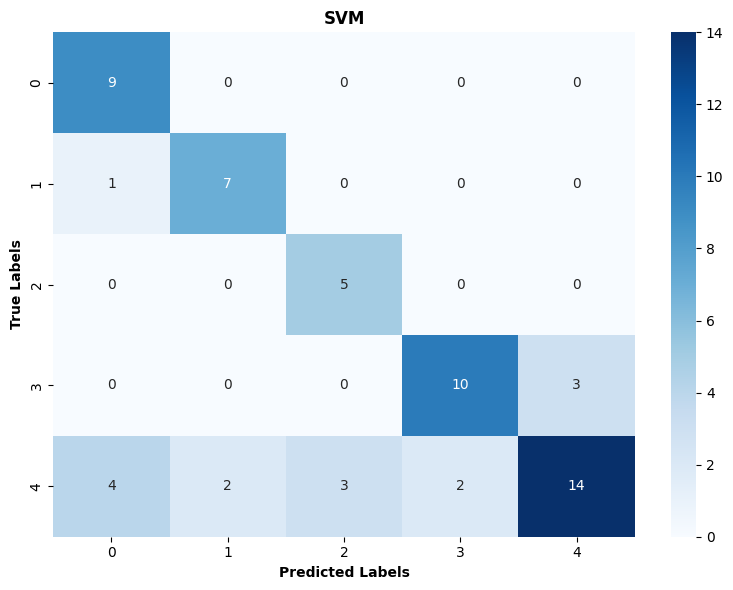

In [119]:
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3)
acc3 = accuracy_score(y_pred3,y_test)
print('SVC accuracy is: {:.2f}%'.format(acc3*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('SVM', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'SVM_cm.png'))

####Naive Bayes

###Categorical NB

              precision    recall  f1-score   support

       drugA       0.57      0.89      0.70         9
       drugB       0.64      0.88      0.74         8
       drugC       0.50      1.00      0.67         5
       drugX       0.81      1.00      0.90        13
       drugY       1.00      0.36      0.53        25

    accuracy                           0.70        60
   macro avg       0.70      0.82      0.71        60
weighted avg       0.80      0.70      0.67        60

Categorical NB accuracy is: 70.00%


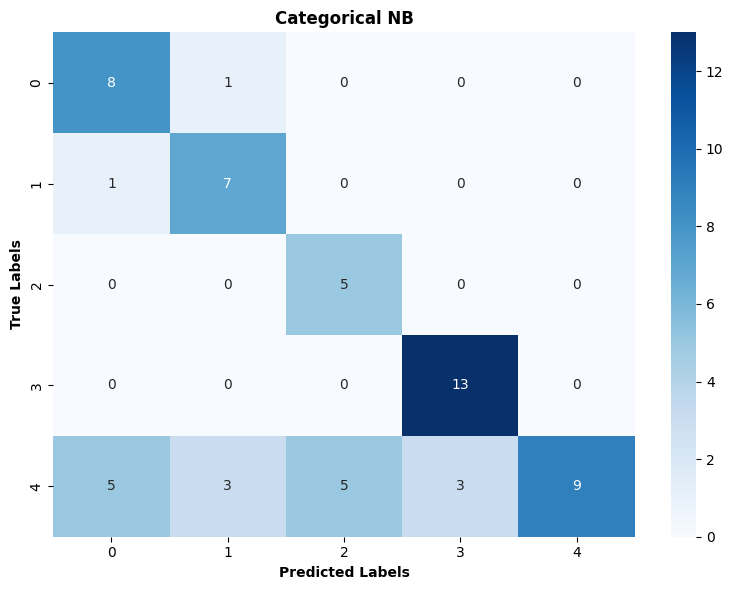

In [120]:
from sklearn.naive_bayes import CategoricalNB
model4 = CategoricalNB(alpha=8)
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

print(classification_report(y_test, y_pred4))
cm=confusion_matrix(y_test, y_pred4)

from sklearn.metrics import accuracy_score
acc4 = accuracy_score(y_pred4,y_test)
print('Categorical NB accuracy is: {:.2f}%'.format(acc4*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Categorical NB', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'catNB_cm.png'))


###Gaussian NB

              precision    recall  f1-score   support

       drugA       0.69      1.00      0.82         9
       drugB       0.70      0.88      0.78         8
       drugC       0.57      0.80      0.67         5
       drugX       0.76      1.00      0.87        13
       drugY       1.00      0.52      0.68        25

    accuracy                           0.77        60
   macro avg       0.75      0.84      0.76        60
weighted avg       0.83      0.77      0.75        60

GaussianNB accuracy is: 76.67%


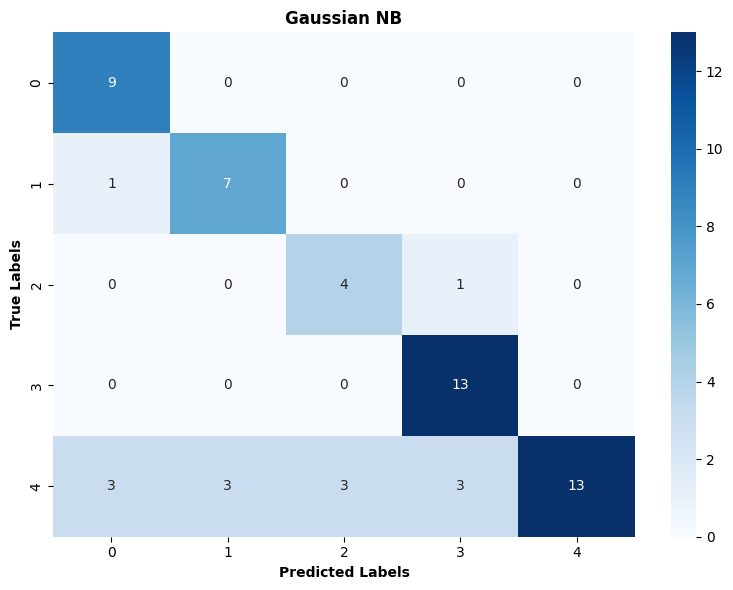

In [121]:
model5 = GaussianNB()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

print(classification_report(y_test, y_pred5))
cm = confusion_matrix(y_test, y_pred5)
acc5 = accuracy_score(y_pred5,y_test)
print('GaussianNB accuracy is: {:.2f}%'.format(acc5*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Gaussian NB', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'GausNB_cm.png'))

###Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       drugA       0.08      0.11      0.10         9
       drugB       0.33      0.88      0.48         8
       drugC       0.50      1.00      0.67         5
       drugX       0.76      1.00      0.87        13
       drugY       0.00      0.00      0.00        25

    accuracy                           0.43        60
   macro avg       0.34      0.60      0.42        60
weighted avg       0.26      0.43      0.32        60

Decision Tree accuracy is: 43.33%


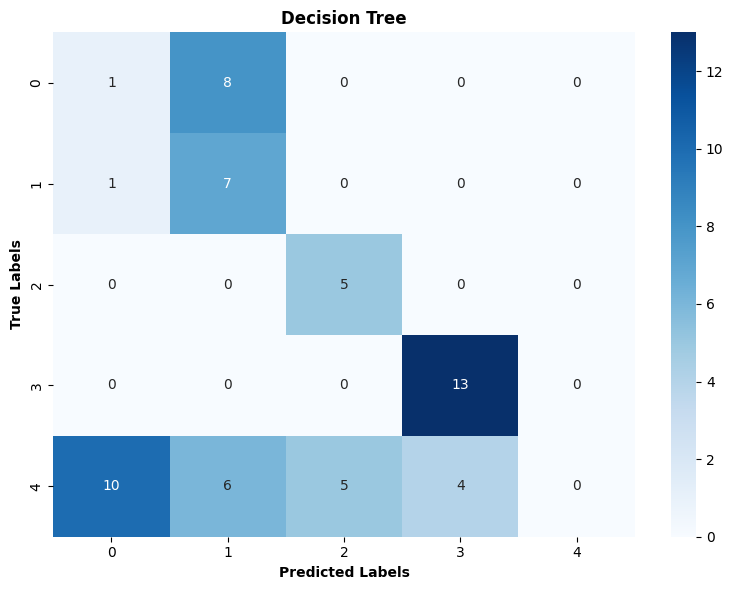

In [122]:
model6 = DecisionTreeClassifier(max_leaf_nodes=5)
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)

print(classification_report(y_test, y_pred6))
cm = confusion_matrix(y_test, y_pred6)

acc6 = accuracy_score(y_pred6,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(acc6*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Decision Tree', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'DT_cm.png'))

DT Acc Max 76.67%


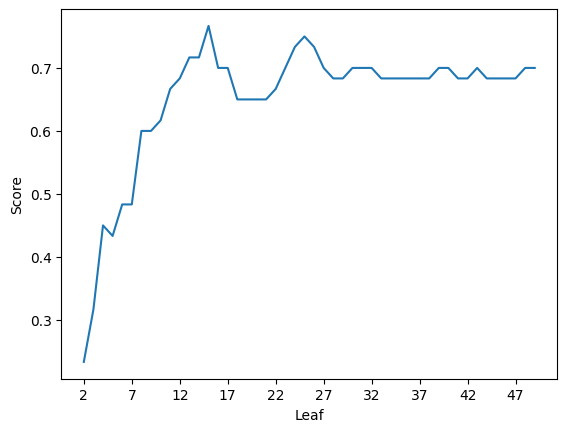

In [123]:
scoresDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoresDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoresDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.savefig(os.path.join(plot_dir,'DT_sores.png'))
AccMax = max(scoresDT)
print("DT Acc Max {:.2f}%".format(AccMax*100))

###Random Forest

              precision    recall  f1-score   support

       drugA       0.50      0.78      0.61         9
       drugB       0.58      0.88      0.70         8
       drugC       0.50      1.00      0.67         5
       drugX       0.81      1.00      0.90        13
       drugY       1.00      0.32      0.48        25

    accuracy                           0.67        60
   macro avg       0.68      0.79      0.67        60
weighted avg       0.79      0.67      0.64        60

Random Forest accuracy is: 66.67%


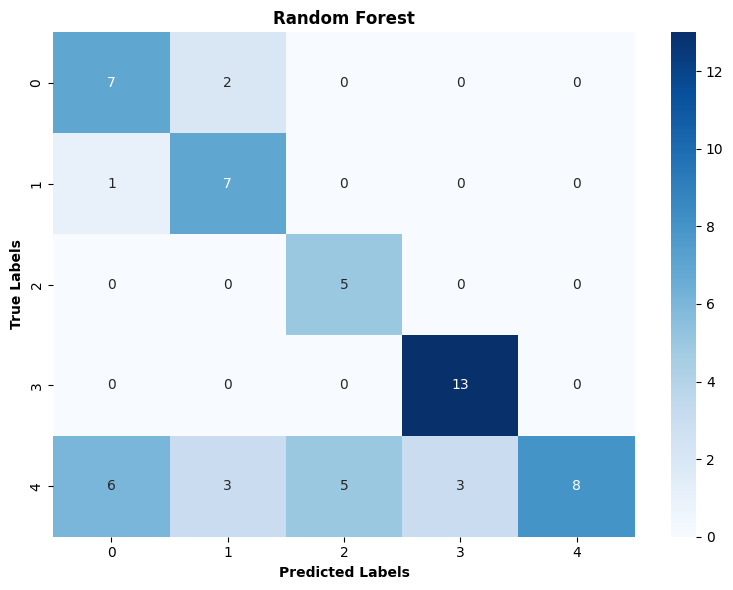

In [124]:
model7 = RandomForestClassifier(max_leaf_nodes=5)
model7.fit(X_train, y_train)

y_pred7 = model7.predict(X_test)

print(classification_report(y_test, y_pred7))
cm = confusion_matrix(y_test, y_pred7)
acc7 = accuracy_score(y_pred7,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(acc7*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Random Forest', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'RF_cm.png'))

RF Acc Max 76.67%


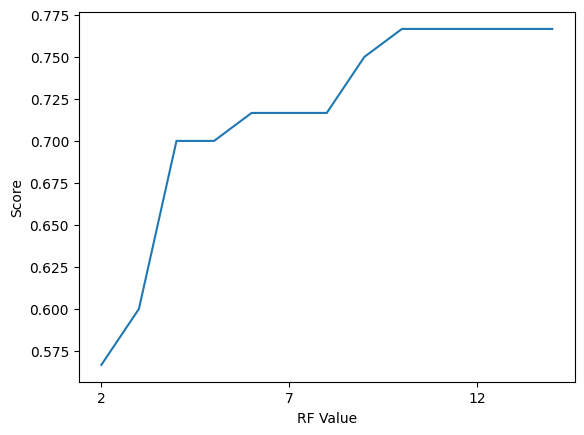

In [125]:
scoresRF = []
for i in range(2,15):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 54, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoresRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,15), scoresRF)
plt.xticks(np.arange(2,15,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.savefig(os.path.join(plot_dir,'RF_scores.png'))
RFAccMax = max(scoresRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

#Model Comparison

In [126]:
before = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Score': [acc1*100, acc2*100, Max_acc*100, acc3*100, acc4*100, acc5*100, acc6*100, AccMax*100, acc7*100, RFAccMax*100]})
before.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.000000
5,Gaussian NB,76.666667
7,Decision Tree Max,76.666667
9,Random Forest Max,76.666667
3,SVM,75.000000
4,Categorical NB,70.000000
8,Random Forest,66.666667
2,K Neighbors Max,63.333333
1,K Neighbors,56.666667
6,Decision Tree,43.333333


In [127]:
before = before[before['Model'] != 'K Neighbors Max']
before = before[before['Model'] != 'Decision Tree Max']
before = before[before['Model'] != 'Random Forest Max']

In [128]:
before=before.reset_index()
before=before.drop('index',axis=1)

In [129]:
before.head(7)

,Model,Score
0,Logistic Regression,80.000000
1,K Neighbors,56.666667
2,SVM,75.000000
3,Categorical NB,70.000000
4,Gaussian NB,76.666667
5,Decision Tree,43.333333
6,Random Forest,66.666667


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'Categorical NB'),
  Text(4, 0, 'Gaussian NB'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'Random Forest')])

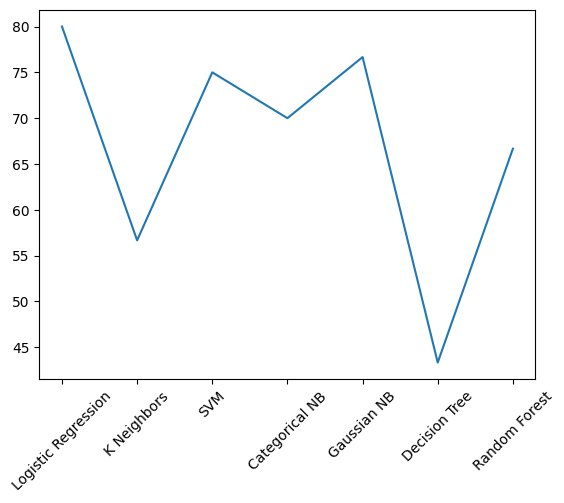

In [130]:
plt.plot(before['Model'],before['Score'])
plt.xticks(rotation=45)

From the results, it can be seen that most of ML models can reach **up to 70% accuracy** in predicting classification of drug type.

##Hyperparameter Tuning

In [131]:
def hyperparameter_tuning(X, y, models, scoring, cv=5, plot_results=True):
    best_models = {}
    for model_name, model in models.items():
        print(f"Tuning {model_name}...")
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=54)

        param_grid = define_param_grid(model)

        grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        best_models[model_name] = (best_model, best_score)

    return best_models

def define_param_grid(model):
    param_grids = {
        LogisticRegression: {'max_iter':[100,1000,5000],'solver':['liblinear']},
        CategoricalNB: {'alpha':[1,2,3]},
        GaussianNB: {},
        RandomForestClassifier: {'n_estimators': [100, 500, 1000],'max_leaf_nodes':[5,10,20,30]},
        DecisionTreeClassifier: {'max_leaf_nodes':[5,10,15,20]},
        SVC: {'kernel':['linear', 'poly', 'rbf'],'max_iter':[250,300,350]},
        KNeighborsClassifier: {'n_neighbors': [10, 15, 20,25]}
    }

    return param_grids.get(type(model), {})

In [132]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Categorical NB': CategoricalNB(),
    'Gaussian NB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),


}
# Perform hyperparameter tuning
x = pd.get_dummies(X).astype(int)
best_models = hyperparameter_tuning(x,y, models, scoring='accuracy')

Tuning Logistic Regression...
Tuning K Neighbors...
Tuning SVM...
Tuning Categorical NB...
Tuning Gaussian NB...
Tuning Decision Tree...
Tuning Random Forest...


In [133]:
best_models

{'Logistic Regression': (LogisticRegression(solver='liblinear'),
  0.7428571428571429),
 'K Neighbors': (KNeighborsClassifier(n_neighbors=15), 0.7214285714285715),
 'SVM': (SVC(kernel='poly', max_iter=250), 0.7642857142857142),
 'Categorical NB': (CategoricalNB(alpha=1), 0.7857142857142857),
 'Gaussian NB': (GaussianNB(), 0.7928571428571427),
 'Decision Tree': (DecisionTreeClassifier(max_leaf_nodes=10),
  0.7928571428571429),
 'Random Forest': (RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000),
  0.7928571428571429)}

BEST MODEL ACCURACY

In [134]:
model_data = [(k, v[0], v[1]) for k, v in best_models.items()]
tuned_results = pd.DataFrame(model_data, columns=['Model', 'Best Parameters', 'Score'])


In [135]:
tuned_results.head(7)

,Model,Best Parameters,Score
0,Logistic Regression,LogisticRegression(solver='liblinear'),0.742857
1,K Neighbors,KNeighborsClassifier(n_neighbors=15),0.721429
2,SVM,"SVC(kernel='poly', max_iter=250)",0.764286
3,Categorical NB,CategoricalNB(alpha=1),0.785714
4,Gaussian NB,GaussianNB(),0.792857
5,Decision Tree,DecisionTreeClassifier(max_leaf_nodes=10),0.792857
6,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', m...",0.792857


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'Categorical NB'),
  Text(4, 0, 'Gaussian NB'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'Random Forest')])

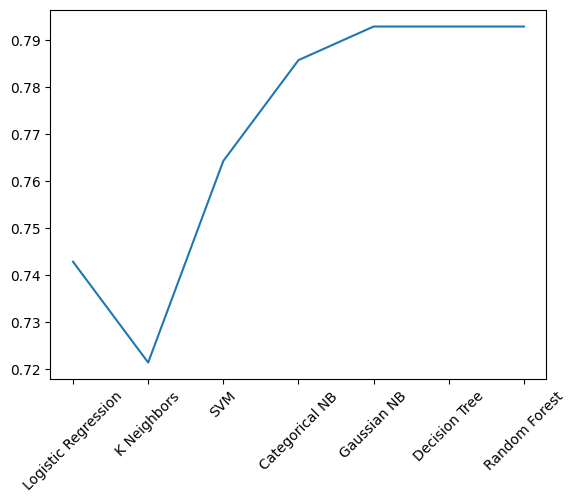

In [136]:
plt.plot(tuned_results['Model'],tuned_results['Score'])
plt.xticks(rotation=45)

In [137]:
merged = {'Model': tuned_results['Model'],
        'before_tuning': before['Score'],
        'after_tuning': tuned_results['Score']}
compare = pd.DataFrame(merged)

In [138]:
compare['after_tuning']=compare['after_tuning'].apply(lambda x: x*100)

In [139]:
compare.head(7)

,Model,before_tuning,after_tuning
0,Logistic Regression,80.000000,74.285714
1,K Neighbors,56.666667,72.142857
2,SVM,75.000000,76.428571
3,Categorical NB,70.000000,78.571429
4,Gaussian NB,76.666667,79.285714
5,Decision Tree,43.333333,79.285714
6,Random Forest,66.666667,79.285714


### Comparing Before tuning and After tuning results

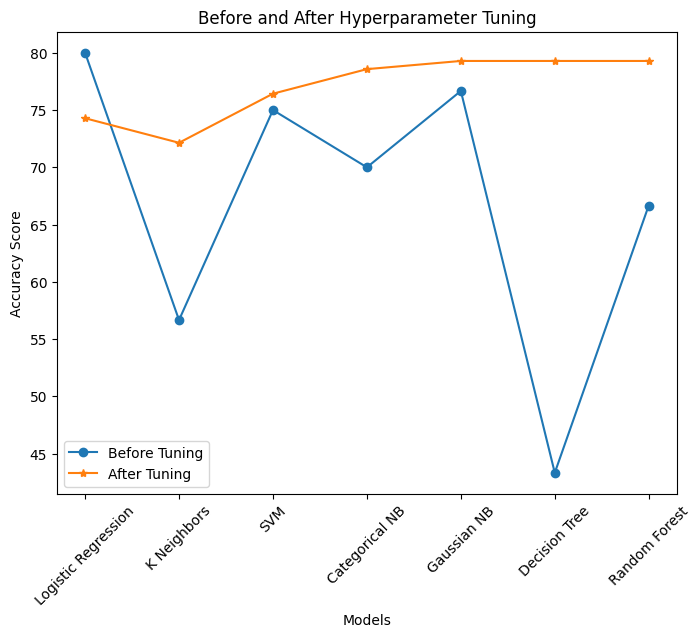

In [140]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(compare['Model'], compare['before_tuning'], label='Before Tuning', marker='o')
ax.plot(compare['Model'], compare['after_tuning'], label='After Tuning', marker='*')
plt.xticks(rotation=45)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Before and After Hyperparameter Tuning')
ax.legend()
plt.savefig(os.path.join(plot_dir,'accuracy_comparison.png'))

#Downloading all the graphs

In [141]:
import zipfile

def zip_folder(folder_path, zip_file_path):
    with zipfile.ZipFile(zip_file_path, mode='w') as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file))

zip_folder('/content/graphs', '/content/my_folder.zip')

In [142]:
from google.colab import files
files.download('/content/my_folder.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>